In [75]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("data.csv")

EXPLORING THE DATASET

In [3]:
df

,Credentials,Age,Test Scores,Performance
0,53,30,57,0
1,43,30,68,1
2,57,37,63,1
3,43,29,62,0
4,60,34,60,1
...,...,...,...,...
995,53,31,69,1
996,41,32,57,0
997,40,26,62,0
998,57,25,57,1


In [4]:
df.info

<bound method DataFrame.info of      Credentials  Age  Test Scores  Performance
0             53   30           57            0
1             43   30           68            1
2             57   37           63            1
3             43   29           62            0
4             60   34           60            1
..           ...  ...          ...          ...
995           53   31           69            1
996           41   32           57            0
997           40   26           62            0
998           57   25           57            1
999           72   34           60            1

[1000 rows x 4 columns]>

In [5]:
df.isnull().sum()

Credentials    0
Age            0
Test Scores    0
Performance    0
dtype: int64

In [6]:
df.shape

(1000, 4)

In [7]:
df.head(10)

,Credentials,Age,Test Scores,Performance
0,53,30,57,0
1,43,30,68,1
2,57,37,63,1
3,43,29,62,0
4,60,34,60,1
5,47,36,65,0
6,41,35,64,0
7,46,27,53,0
8,45,27,63,1
9,50,19,60,0


In [8]:
df.tail()

,Credentials,Age,Test Scores,Performance
995,53,31,69,1
996,41,32,57,0
997,40,26,62,0
998,57,25,57,1
999,72,34,60,1


In [9]:
df.dtypes

Credentials    int64
Age            int64
Test Scores    int64
Performance    int64
dtype: object

In [10]:
df.duplicated().sum()

51

In [11]:
df.describe()

,Credentials,Age,Test Scores,Performance
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.089000,30.093000,60.228000,0.497000
std,5.953362,4.934846,5.997999,0.500241
min,33.000000,12.000000,35.000000,0.000000
25%,46.000000,27.000000,56.000000,0.000000
50%,50.000000,30.000000,60.000000,0.000000
75%,54.000000,33.000000,65.000000,1.000000
max,72.000000,47.000000,82.000000,1.000000


In [12]:
Age_counts = df['Age'].value_counts()
Credentials_counts = df['Credentials'].value_counts()
Test_Scores_counts = df['Test Scores'].value_counts()
Performance_counts = df['Performance'].value_counts()

print(Age_counts)
print('----------------------------------------------------------' )
print('----------------------------------------------------------')
print(Credentials_counts)
print('----------------------------------------------------------')
print(Test_Scores_counts)
print('----------------------------------------------------------')
print(Performance_counts)
print('----------------------------------------------------------')


29    106
30     90
27     71
31     67
28     66
32     66
33     65
34     59
26     56
36     49
25     45
35     39
24     39
23     31
38     29
37     19
22     18
40     18
39     16
21     14
19      7
20      7
43      5
41      4
42      3
16      3
18      2
17      2
15      1
47      1
46      1
12      1
Name: Age, dtype: int64
----------------------------------------------------------
----------------------------------------------------------
49    71
52    66
46    65
47    62
45    61
54    59
51    57
50    55
48    55
53    53
55    51
56    41
58    38
43    34
57    30
42    29
44    26
41    21
60    20
40    19
59    17
61    12
36    10
38     9
62     8
63     7
39     6
64     4
65     3
34     2
37     2
35     2
68     1
33     1
66     1
67     1
72     1
Name: Credentials, dtype: int64
----------------------------------------------------------
59    86
60    66
61    63
64    57
57    55
62    55
65    53
63    51
56    50
67    47
66    44
53    42
54    

In [13]:
# correlation between Credentials and Performance
print(df['Credentials'].corr(df['Performance']))

0.4943523921641458


In [14]:
# correlation between Age and Performance
print(df['Age'].corr(df['Performance']))

0.015319053562974425


In [15]:
# correlation between Age and Performance
print(df['Test Scores'].corr(df['Performance']))

0.5743837220091127


In [16]:
# pair-wise correlation between columns
print(df.corr())

             Credentials       Age  Test Scores  Performance
Credentials     1.000000  0.001217     0.042882     0.494352
Age             0.001217  1.000000     0.046291     0.015319
Test Scores     0.042882  0.046291     1.000000     0.574384
Performance     0.494352  0.015319     0.574384     1.000000


In [17]:
# Select the 'age' and 'target_performance' variables
Cred = df['Credentials'] 
per_t = df['Performance'] 

# Perform linear regression
result = stats.linregress(Cred, per_t)

# Access the regression results
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue
pvalue = result.pvalue
stderr = result.stderr

# Print the regression results
print("Slope:", slope)
print("Intercept:", intercept)
print("R-value:", rvalue)
print("P-value:", pvalue)
print("Standard Error:", stderr)


Slope: 0.041538783812129824
Intercept: -1.583636142365771
R-value: 0.49435239216414584
P-value: 9.529844960435711e-63
Standard Error: 0.0023120773346226604


In [18]:
# Select the 'age' and 'target_performance' variables
Test_scores = df['Test Scores'] 
per_t = df['Performance'] 

# Perform linear regression
result = stats.linregress(Cred, Test_scores)

# Access the regression results
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue
pvalue = result.pvalue
stderr = result.stderr

# Print the regression results
print("Slope:", slope)
print("Intercept:", intercept)
print("R-value:", rvalue)
print("P-value:", pvalue)
print("Standard Error:", stderr)

Slope: 0.04320345092573166
Intercept: 58.06398234658103
R-value: 0.04288193309609918
P-value: 0.17542614498202744
Standard Error: 0.031862448126708


In [19]:
# Select the 'age' and 'target_performance' variables
Ager = df['Age'] 
per_t = df['Performance'] 

# Perform linear regression
result = stats.linregress(Ager, per_t)

# Access the regression results
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue
pvalue = result.pvalue
stderr = result.stderr

# Print the regression results
print("Slope:", slope)
print("Intercept:", intercept)
print("R-value:", rvalue)
print("P-value:", pvalue)
print("Standard Error:", stderr)

Slope: 0.001552879601252054
Intercept: 0.45026919415952193
R-value: 0.015319053562974428
P-value: 0.6284898343405203
Standard Error: 0.003208408181158814


In [20]:
#Mulitple regression

# Select the columns for multiple regression
X = df[['Credentials', 'Age', 'Test Scores']]  # Replace with the actual column names for the predictors
y = df['Performance']  # Replace with the actual column name for the target variable

# Add a constant term to the predictors
X = sm.add_constant(X)

# Create a linear regression model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()

# Print the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     407.6
Date:                Tue, 30 May 2023   Prob (F-statistic):          1.13e-172
Time:                        13:53:09   Log-Likelihood:                -325.32
No. Observations:                1000   AIC:                             658.6
Df Residuals:                     996   BIC:                             678.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.2366      0.149    -28.383      

C:\Users\mphod\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# DATA EXPLORATION

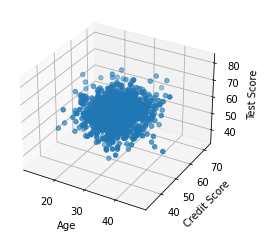

In [21]:
# Extract the values from the columns
age = df['Age']
credit_score = df['Credentials']
test_score = df['Test Scores']

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(age, credit_score, test_score)

# Set labels for each axis
ax.set_xlabel('Age')
ax.set_ylabel('Credit Score')
ax.set_zlabel('Test Score')

# Show the plot
plt.show()

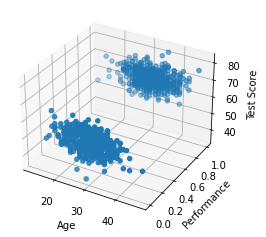

In [22]:
age = df['Age']
credit_score = df['Performance']
test_score = df['Test Scores']

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(age, credit_score, test_score)

# Set labels for each axis
ax.set_xlabel('Age')
ax.set_ylabel('Performance')
ax.set_zlabel('Test Score')

# Show the plot
plt.show()

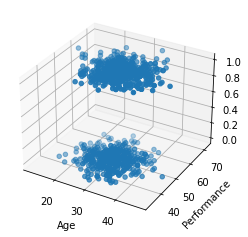

In [23]:
credit_score = df['Credentials']
test_score = df['Performance']

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(age, credit_score, test_score)

# Set labels for each axis
ax.set_ylabel('Performance')
ax.set_xlabel('Age')



# Show the plot
plt.show()

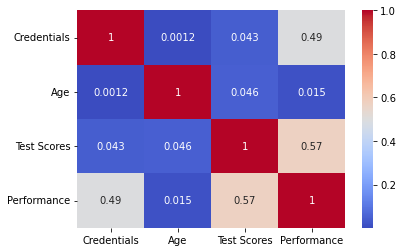

In [24]:
# visualiZing the correlations
corr_matrix = df[['Credentials', 'Age', 'Test Scores', 'Performance']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

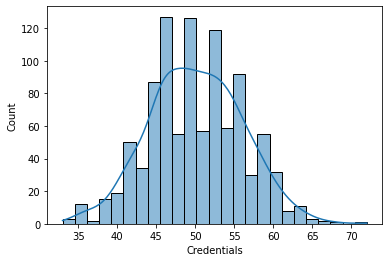

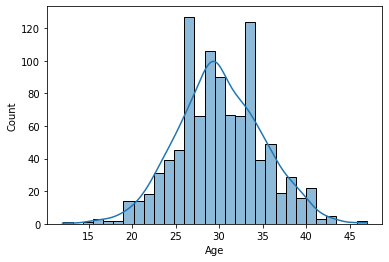

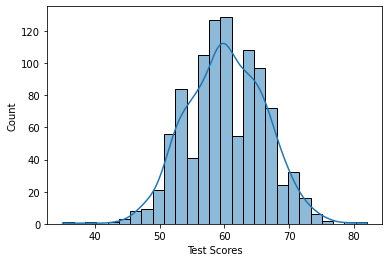

In [25]:
# Explore the predictor variable
sns.histplot(data=df, x='Credentials', kde=True)
plt.show()

#
sns.histplot(data=df, x='Age', kde=True)
plt.show()

#
sns.histplot(data=df, x='Test Scores', kde=True)
plt.show()



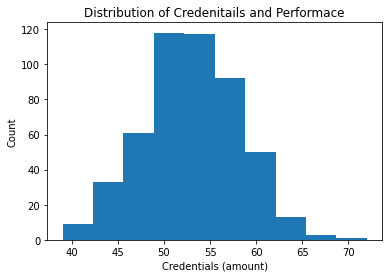

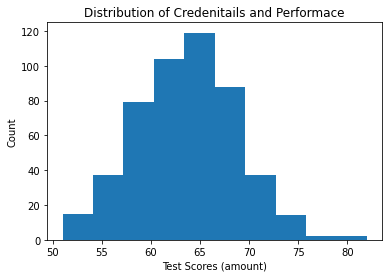

In [26]:
# Filter dataset for individuals with heart disease
df_heart = df[df["Performance"] == 1]

# Histogram of age distributionabs
plt.hist(df_heart["Credentials"])
plt.title("Distribution of Credenitails and Performace")
plt.xlabel("Credentials (amount)")
plt.ylabel("Count")
plt.show()

# Filter dataset for individuals with heart disease
df_heart = df[df["Performance"] == 1]

# Histogram of age distributionabs
plt.hist(df_heart["Test Scores"])
plt.title("Distribution of Credenitails and Performace")
plt.xlabel("Test Scores (amount)")
plt.ylabel("Count")
plt.show()

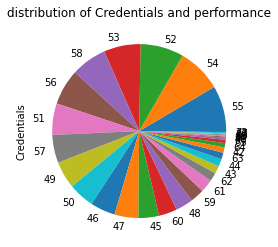

In [27]:
# Distribution of different types of chest pain among patients with heart disease
df_cp = df[df["Performance"] == 1]["Credentials"].value_counts()
df_cp.plot(kind="pie")
plt.title("distribution of Credentials and performance")
plt.show()

Text(0.5, 1.0, 'Disribution of Credentials and Performance')

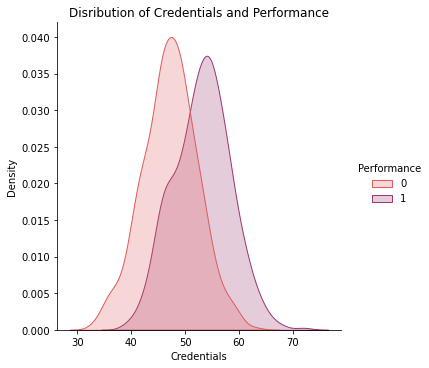

In [28]:
sns.displot(data=df,x='Credentials',hue='Performance',palette='flare',kind='kde',fill=True)
plt.title('Disribution of Credentials and Performance')

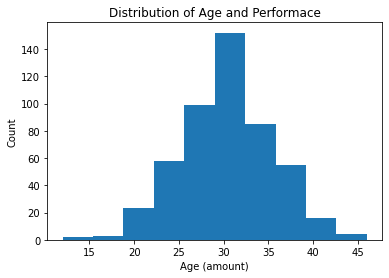

In [29]:
# Filter dataset for individuals with heart disease
df_heart = df[df["Performance"] == 1]

# Histogram of age distributionabs
plt.hist(df_heart["Age"])
plt.title("Distribution of Age and Performace")
plt.xlabel("Age (amount)")
plt.ylabel("Count")
plt.show()



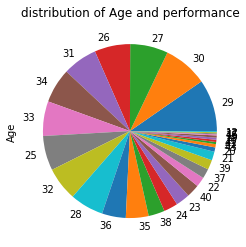

In [30]:
# Distribution of different types of chest pain among patients with heart disease
df_cp = df[df["Performance"] == 1]["Age"].value_counts()
df_cp.plot(kind="pie")
plt.title("distribution of Age and performance")
plt.show()

NameError: name 'Age' is not defined

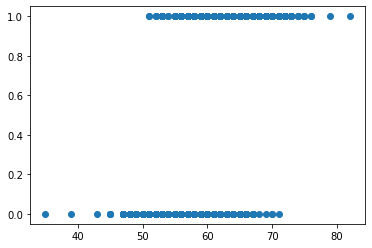

In [31]:
# Select the 'age' and 'target_performance' variables
Test_scores = df['Test Scores'] 
per_t = df['Performance']

# Perform linear regression
result = stats.linregress(Test_scores, per_t)

# Get the regression line
regression_line = result.intercept + result.slope * per_t

# Create a scatter plot with the regression line
plt.scatter(Test_scores, per_t, label='Data Points')
plt.plot(Age, regression_line, color='red', label='Linear Regression')
plt.xlabel('Test Scores')
plt.ylabel('Performance')
plt.title('Linear Regression: Age vs Target Performance')
plt.legend()
plt.show()

C:\Users\mphod\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


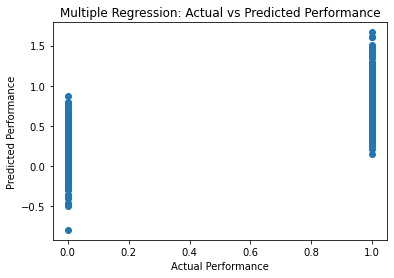

In [32]:
# Select the columns for multiple regression
X = df[['Credentials', 'Age', 'Test Scores']]  # Replace with the actual column names for the predictors
y = df['Performance']  # Replace with the actual column name for the target variable

# Add a constant term to the predictors
X = sm.add_constant(X)

# Create a linear regression model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()

# Get the predicted values
y_pred = results.predict(X)

# Create a scatter plot of the actual vs predicted values
plt.scatter(y, y_pred)
plt.xlabel('Actual Performance')
plt.ylabel('Predicted Performance')
plt.title('Multiple Regression: Actual vs Predicted Performance')
plt.show()

# FEATURE SELCTION

In [33]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the three columns for feature selection
X = df[['Credentials', 'Age', 'Test Scores']]  # Replace with the actual column names

# Select the target variable
y = df['Performance']  # Replace with the actual column name

# Perform feature selection
selector = SelectKBest(score_func=f_regression, k=2)  # Select top 2 features
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support(indices=True)].tolist()

# Print the selected feature names
print("Selected Features:", selected_feature_names)


Selected Features: ['Credentials', 'Test Scores']


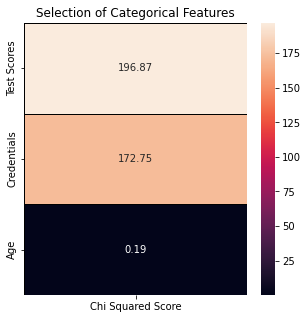

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2

# Assuming df1 is your DataFrame containing the data
features = df[['Age', 'Credentials', 'Test Scores']]
target = df['Performance']

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data=fit.scores_, index=features.columns, columns=['Chi Squared Score'])

plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(by='Chi Squared Score', ascending=False),
            annot=True,
            linewidths=0.6,
            linecolor='black',
            fmt='.2f')
plt.title('Selection of Numerical Features')

plt.show()


In [36]:
# Drop the 'age' column
df = df.drop('Age', axis=1)
df

,Credentials,Test Scores,Performance
0,53,57,0
1,43,68,1
2,57,63,1
3,43,62,0
4,60,60,1
...,...,...,...
995,53,69,1
996,41,57,0
997,40,62,0
998,57,57,1


In [49]:
# Check for missing values
missing_values = df.isnull().sum()

# Print the missing values
print(missing_values)

Credentials    0
Test Scores    0
Performance    0
dtype: int64


# SPLIT THE DATA INTO TRAINING,TESTING VALIDATION

In [86]:
# Split the data into features (X) and target variable (y)
X = df[['Credentials', 'Test Scores']]  # Features
y = df['Performance']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [87]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((800, 2), (200, 2))

# FEATURE ENGINEERING

In [90]:
X_train.dtypes

Credentials    int64
Test Scores    int64
dtype: object

In [91]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

Credentials    0
Test Scores    0
dtype: int64

In [92]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

Credentials    0
Test Scores    0
dtype: int64

In [93]:
# Calculate the IQR for each numerical column


Columns with outliers: Index(['Test Scores', 'Credentials', 'Credentials', 'Test Scores',
       'Credentials', 'Test Scores', 'Test Scores'],
      dtype='object')


# FEATURE SCALING

In [94]:
X_train.describe()

,Credentials,Test Scores
count,800.000000,800.000000
mean,50.201250,60.220000
std,5.928928,5.926889
min,34.000000,35.000000
25%,46.000000,56.000000
50%,50.000000,60.000000
75%,54.000000,64.000000
max,72.000000,82.000000


In [95]:
cols = X_train.columns

In [96]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [97]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [98]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [99]:
X_train.describe()

,Credentials,Test Scores
count,800.000000,800.000000
mean,0.426349,0.536596
std,0.156024,0.126104
min,0.000000,0.000000
25%,0.315789,0.446809
50%,0.421053,0.531915
75%,0.526316,0.617021
max,1.000000,1.000000


# MODEL TRAINING

In [100]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

# PREDICT RESULT

In [101]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0], dtype=int64)

In [102]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.65245368, 0.91500209, 0.84591423, 0.91223037, 0.58844438,
       0.80608212, 0.66560646, 0.473393  , 0.29116561, 0.72442886,
       0.7379559 , 0.36380481, 0.21201532, 0.26105042, 0.69457696,
       0.26331515, 0.16276354, 0.38958001, 0.50959983, 0.21103901,
       0.28995894, 0.54425462, 0.13969044, 0.94103971, 0.72442886,
       0.51398769, 0.61197951, 0.9581227 , 0.77739493, 0.82095825,
       0.15959786, 0.75673938, 0.84818936, 0.53844094, 0.77941437,
       0.21299493, 0.36109943, 0.31686597, 0.57419815, 0.0702077 ,
       0.11942161, 0.0599822 , 0.08158461, 0.47047534, 0.77941437,
       0.32580163, 0.46319044, 0.69457696, 0.3206795 , 0.31813445,
       0.75240314, 0.23512502, 0.78241883, 0.93570826, 0.44179016,
       0.18261513, 0.23723705, 0.86995097, 0.59410303, 0.50521048,
       0.50959983, 0.71259072, 0.35437472, 0.2268077 , 0.39656244,
       0.28995894, 0.18349053, 0.39097298, 0.14039542, 0.54280226,
       0.62166401, 0.09715473, 0.75021567, 0.20716673, 0.20716

In [103]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.34754632, 0.08499791, 0.15408577, 0.08776963, 0.41155562,
       0.19391788, 0.33439354, 0.526607  , 0.70883439, 0.27557114,
       0.2620441 , 0.63619519, 0.78798468, 0.73894958, 0.30542304,
       0.73668485, 0.83723646, 0.61041999, 0.49040017, 0.78896099,
       0.71004106, 0.45574538, 0.86030956, 0.05896029, 0.27557114,
       0.48601231, 0.38802049, 0.0418773 , 0.22260507, 0.17904175,
       0.84040214, 0.24326062, 0.15181064, 0.46155906, 0.22058563,
       0.78700507, 0.63890057, 0.68313403, 0.42580185, 0.9297923 ,
       0.88057839, 0.9400178 , 0.91841539, 0.52952466, 0.22058563,
       0.67419837, 0.53680956, 0.30542304, 0.6793205 , 0.68186555,
       0.24759686, 0.76487498, 0.21758117, 0.06429174, 0.55820984,
       0.81738487, 0.76276295, 0.13004903, 0.40589697, 0.49478952,
       0.49040017, 0.28740928, 0.64562528, 0.7731923 , 0.60343756,
       0.71004106, 0.81650947, 0.60902702, 0.85960458, 0.45719774,
       0.37833599, 0.90284527, 0.24978433, 0.79283327, 0.79283

# Check accuracy score

In [105]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8900


# COMPARE TRTAIN VS TEST ACCURACY

In [106]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,

In [107]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8662


# Check for overfitting and underfitting

In [108]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8662
Test set score: 0.8900


# Compare model accuracy with null accuracy

In [109]:
# check class distribution in test set

y_test.value_counts()

1    101
0     99
Name: Performance, dtype: int64

In [110]:
# check null accuracy score

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


# Confusion matrix 

In [111]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[89 10]
 [12 89]]

True Positives(TP) =  89

True Negatives(TN) =  89

False Positives(FP) =  10

False Negatives(FN) =  12


<AxesSubplot:>

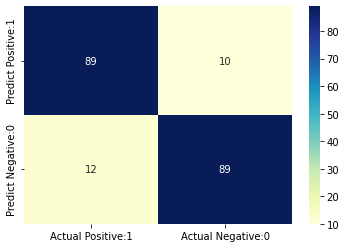

In [112]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification Report

In [113]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        99
           1       0.90      0.88      0.89       101

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



# Classification accuracy

In [114]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [115]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8900


# Classification error

In [116]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1100


# ROC - AUC

In [120]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9560


# Hyperparameter Optimization using GridSearch CV

In [121]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [122]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8738


Parameters that give the best results : 

 {'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(penalty='l1', random_state=0, solver='liblinear')


In [123]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8800
